# Supplementary Fig 2

This notebook creates the sup fig that visualizes the structure of a corporate board-room network with two types of interactions between members.

In [1]:
%pylab inline 
import networkx as nx
import matplotlib.patches as patches

import sys
sys.path.append('../utils')
from network_properties import *
# from network_properties2 import *

Populating the interactive namespace from numpy and matplotlib


In [21]:
def network_visualization(G,intra_layer_edge_list,inter_layer_edge_list,edge_colors):
    n = G[0] # number of nodes in each layer
    t = G[1] # number of layers

    pos = get_node_position(G)
    Gm = nx.DiGraph()
    Gm.add_nodes_from(pos)
    
    fig,ax = subplots(1,1,figsize = (7,5))
    
    nx.draw_networkx_nodes(Gm, pos=pos,
                       node_color = 'k',
                           alpha = .8,
                     node_size = 100,
                     node_label = False,
                    edgecolors = 'k'
                          )

    for i_t in range(t):
        nx.draw_networkx_edges(Gm, 
                               pos=pos,  
                               edgelist = intra_layer_edge_list[i_t],
                               alpha = .6,
                               edge_color = edge_colors[i_t],
                              );

    nx.draw_networkx_edges(Gm, 
                           pos=pos,  
                           edgelist = inter_layer_edge_list,
                           alpha = .3,
                          );

    fig.text(.87, .68, 'Advice',fontsize=14)
    fig.text(.87, .3, 'Friendship',fontsize=14)

#     x = [-.9,.65,.85,-.7]
#     y1 = [-1.2,-1.2,1.2,1.2]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y1)),facecolor=edge_colors[0],alpha=.2 ))
#     y2 = [-4.2,-4.2,-1.8,-1.8]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y2)),facecolor=edge_colors[1],alpha=.2 ))

    plt.box(False)

In [22]:
G = get_network_properties('Krackhardt-High-Tech')
G[3][0].edges.data()

OutEdgeDataView([(1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 9, {}), (1, 10, {}), (1, 11, {}), (1, 13, {}), (1, 15, {}), (1, 16, {}), (1, 17, {}), (1, 18, {}), (1, 19, {}), (1, 20, {}), (2, 1, {}), (2, 3, {}), (2, 4, {}), (2, 5, {}), (2, 7, {}), (2, 8, {}), (2, 9, {}), (2, 10, {}), (2, 11, {}), (2, 13, {}), (2, 14, {}), (2, 15, {}), (2, 16, {}), (2, 17, {}), (2, 18, {}), (2, 19, {}), (2, 20, {}), (2, 21, {}), (3, 10, {}), (3, 15, {}), (3, 18, {}), (3, 19, {}), (3, 21, {}), (4, 1, {}), (4, 3, {}), (4, 8, {}), (4, 10, {}), (4, 15, {}), (4, 17, {}), (4, 18, {}), (4, 21, {}), (5, 10, {}), (5, 13, {}), (5, 15, {}), (5, 18, {}), (5, 19, {}), (6, 2, {}), (6, 3, {}), (6, 4, {}), (6, 5, {}), (6, 7, {}), (6, 8, {}), (6, 9, {}), (6, 15, {}), (6, 20, {}), (6, 21, {}), (7, 2, {}), (7, 3, {}), (7, 5, {}), (7, 8, {}), (7, 9, {}), (7, 11, {}), (7, 12, {}), (7, 14, {}), (7, 15, {}), (7, 17, {}), (7, 18, {}), (7, 19, {}), (7, 21, {}), (8, 1, {}), (8, 3, {}), (8, 4, {}), (8, 5, {}), (8, 9, {}), (8, 10, {}), 

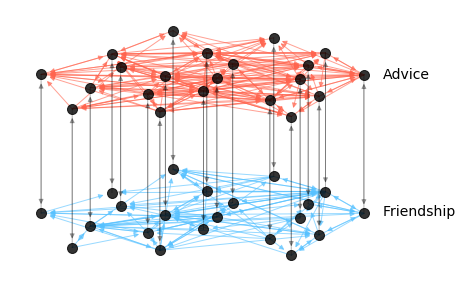

In [23]:
G = get_network_properties('Krackhardt-High-Tech')

n = G[0] # number of nodes in each layer
edges_file_name = 'Krackhardt-High-Tech_Multiplex_Social' + '/Dataset/' + 'Krackhardt-High-Tech_multiplex.edges'
intra_layer_edge_list = get_intra_layer_edges(edges_file_name,n)


inter_layer_edge_list = [(i,i+n) for i in range(1,n+1)] + [(i+n,i) for i in range(1,n+1)] # 2 layer networks

edge_colors = ['#FF644E','#56C1FF']

network_visualization(G,intra_layer_edge_list,inter_layer_edge_list,edge_colors)

In [38]:
def relabel_nodes(G):
    n = G[0]
    t = G[1]
    for i_t in range(t)[1:]:
        mapping = {i+1:i+1+i_t*n for i in range(n)}
        G[3][i_t] = nx.relabel_nodes(G[3][i_t], mapping)
    return G

In [39]:
G = get_network_properties('Krackhardt-High-Tech')
G[3][1].nodes


NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21))

In [40]:
G_relabel = relabel_nodes(G)
G_relabel[3][1].nodes

NodeView((22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42))

In [41]:
n=6
mapping = {i+1+n:i+1 for i in range(n)}
mapping

{7: 1, 8: 2, 9: 3, 10: 4, 11: 5, 12: 6}

In [84]:
def network_visualization(G,inter_layer_edge_list,edge_colors):
    n = G[0] # number of nodes in each layer
    t = G[1] # number of layers
    G_relabel = relabel_nodes(G)

    pos = get_node_position(G)
    Gm = nx.DiGraph()
    Gm.add_nodes_from(pos)
    
    fig,ax = subplots(1,1,figsize = (7,5))
    
    nx.draw_networkx_nodes(Gm, pos=pos,
                       node_color = 'k',
                           alpha = .8,
                     node_size = 100,
                     node_label = True,
                    edgecolors = 'k'
                          )

    for i_t in range(t):
        nx.draw_networkx_edges(G[3][i_t], 
                               pos=pos,  
                               edgelist = G[3][i_t].edges(),
                               alpha = .6,
                               edge_color = edge_colors[i_t],
                              );
        nx.draw_networkx_labels(G[3][i_t], pos, font_size=20, font_family="sans-serif")

    nx.draw_networkx_edges(Gm, 
                           pos=pos,  
                           edgelist = inter_layer_edge_list,
                           alpha = .3,
                          );
    
    


    fig.text(.87, .68, 'Advice',fontsize=14)
    fig.text(.87, .3, 'Friendship',fontsize=14)

#     x = [-.9,.65,.85,-.7]
#     y1 = [-1.2,-1.2,1.2,1.2]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y1)),facecolor=edge_colors[0],alpha=.2 ))
#     y2 = [-4.2,-4.2,-1.8,-1.8]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y2)),facecolor=edge_colors[1],alpha=.2 ))

    plt.box(False)

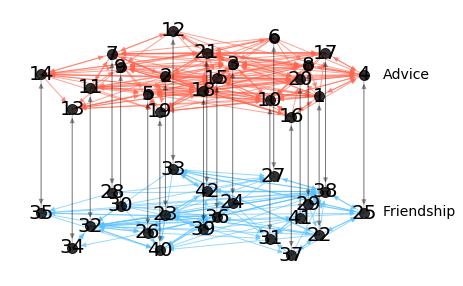

In [85]:
G = get_network_properties('Krackhardt-High-Tech')

n = G[0] # number of nodes in each layer
# edges_file_name = 'Krackhardt-High-Tech_Multiplex_Social' + '/Dataset/' + 'Krackhardt-High-Tech_multiplex.edges'
# intra_layer_edge_list = get_intra_layer_edges(edges_file_name,n)


inter_layer_edge_list = [(i,i+n) for i in range(1,n+1)] + [(i+n,i) for i in range(1,n+1)] # 2 layer networks

intra_layer_edge_colors = ['#FF644E','#56C1FF'] 

network_visualization(G,inter_layer_edge_list,intra_layer_edge_colors)

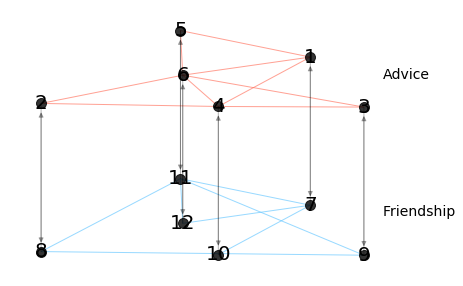

In [86]:
# G = get_network_properties('RingGraph')

G = get_network_properties('SimpleNetwork')

n = G[0] # number of nodes in each layer
# edges_file_name = 'Krackhardt-High-Tech_Multiplex_Social' + '/Dataset/' + 'Krackhardt-High-Tech_multiplex.edges'
# intra_layer_edge_list = get_intra_layer_edges(edges_file_name,n)


inter_layer_edge_list = [(i,i+n) for i in range(1,n+1)] + [(i+n,i) for i in range(1,n+1)] # 2 layer networks

intra_layer_edge_colors = ['#FF644E','#56C1FF']

network_visualization(G,inter_layer_edge_list,intra_layer_edge_colors)

In [67]:
G = get_network_properties('SimpleNetwork')
G[3][0].edges

EdgeView([(1, 4), (1, 5), (1, 6), (4, 2), (4, 3), (4, 6), (5, 6), (6, 2), (6, 3)])

In [49]:
G = get_network_properties('RingGraph')
G[3][0].edges

OutEdgeView([(6, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 6)])

In [90]:
G = get_network_properties('RingGraph')
n = G[0]
t = G[1]
G1 = G[3][0]
pos = {}
#     pos = nx.spring_layout(G1) # nodes positions of layer 1
#     pos = nx.shell_layout(G1) # nodes positions of layer 1
#     pos = nx.circular_layout(G1) # nodes positions of layer 1
pos[1] = nx.kamada_kawai_layout(G1) # nodes positions of layer 1

# nodes positions of remaining layers
pos[i_t+2][i_n] = array([xy[0],xy[1]-3] for xy in pos[i_t+1][i_n] for i_n in range(n) for i_t in range(t))

NameError: name 'i_t' is not defined

In [94]:
G = get_network_properties('RingGraph')
nx.kamada_kawai_layout(G[3][0])

{6: array([1.00000000e+00, 3.21344942e-08]),
 5: array([0.49999998, 0.86602543]),
 4: array([-0.50000003,  0.86602539]),
 3: array([-9.99999999e-01, -3.49322436e-08]),
 2: array([-0.49999997, -0.86602543]),
 1: array([ 0.50000002, -0.8660254 ])}

In [101]:
G = get_network_properties('RingGraph')
n = G[0]
t = G[1]
G1 = G[3][0]
pos = {}
#     pos = nx.spring_layout(G1) # nodes positions of layer 1
#     pos = nx.shell_layout(G1) # nodes positions of layer 1
#     pos = nx.circular_layout(G1) # nodes positions of layer 1
pos['layer 1'] = nx.kamada_kawai_layout(G1) # nodes positions of layer 1

# nodes positions of remaining layers
for i_t in range(1,t):
    pos['layer '+str(i_t+1)] = pos['layer '+str(i_t)]
    for i in range(1,n+1):
        xy = pos['layer '+str(i_t)][i]
        pos['layer '+str(i_t+1)][i] = array([xy[0],xy[1]-3])
pos

{'layer 1': {6: array([ 1.        , -2.99999997]),
  5: array([ 0.49999998, -2.13397457]),
  4: array([-0.50000003, -2.13397461]),
  3: array([-1.        , -3.00000003]),
  2: array([-0.49999997, -3.86602543]),
  1: array([ 0.50000002, -3.8660254 ])},
 'layer 2': {6: array([ 1.        , -2.99999997]),
  5: array([ 0.49999998, -2.13397457]),
  4: array([-0.50000003, -2.13397461]),
  3: array([-1.        , -3.00000003]),
  2: array([-0.49999997, -3.86602543]),
  1: array([ 0.50000002, -3.8660254 ])}}

In [7]:
def network_visualization(G,inter_layer_edge_list,edge_colors):
    n = G[0] # number of nodes in each layer
    t = G[1] # number of layers
#     G_relabel = relabel_nodes(G)

    pos,pos_relabel = get_node_position(G)
    Gm = nx.DiGraph()
    Gm.add_nodes_from(pos_relabel)
    
    fig,ax = subplots(1,1,figsize = (7,5))
    
    nx.draw_networkx_nodes(Gm, pos=pos_relabel,
                       node_color = 'k',
                           alpha = .8,
                     node_size = 100,
                     node_label = True,
                    edgecolors = 'k'
                          )

    for i_t in range(t):
        nx.draw_networkx_edges(G[3][i_t], 
                               pos=pos['layer '+str(i_t+1)],  
#                                pos=pos_relabel,
                               edgelist = G[3][i_t].edges(),
                               alpha = .6,
                               edge_color = edge_colors[i_t],
                              );
        nx.draw_networkx_labels(G[3][i_t], pos=pos['layer '+str(i_t+1)], font_size=20, font_family="sans-serif")

    nx.draw_networkx_edges(Gm, 
                           pos=pos_relabel,  
                           edgelist = inter_layer_edge_list,
                           alpha = .3,
                          );
    
    


    fig.text(.87, .68, 'Advice',fontsize=14)
    fig.text(.87, .3, 'Friendship',fontsize=14)

#     x = [-.9,.65,.85,-.7]
#     y1 = [-1.2,-1.2,1.2,1.2]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y1)),facecolor=edge_colors[0],alpha=.2 ))
#     y2 = [-4.2,-4.2,-1.8,-1.8]
#     ax.add_patch(patches.Polygon(xy=list(zip(x,y2)),facecolor=edge_colors[1],alpha=.2 ))

    plt.box(False)

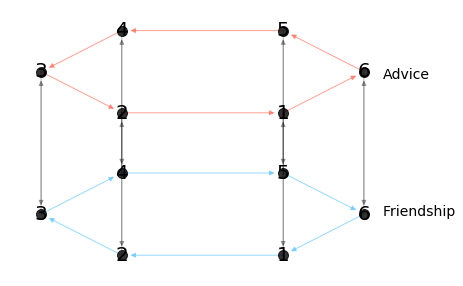

In [8]:
G = get_network_properties('RingGraph')

# G = get_network_properties('SimpleNetwork')

n = G[0] # number of nodes in each layer
# edges_file_name = 'Krackhardt-High-Tech_Multiplex_Social' + '/Dataset/' + 'Krackhardt-High-Tech_multiplex.edges'
# intra_layer_edge_list = get_intra_layer_edges(edges_file_name,n)


inter_layer_edge_list = [(i,i+n) for i in range(1,n+1)] + [(i+n,i) for i in range(1,n+1)] # 2 layer networks

intra_layer_edge_colors = ['#FF644E','#56C1FF']

network_visualization(G,inter_layer_edge_list,intra_layer_edge_colors)

In [2]:
G = get_network_properties('RingGraph')
pos,pos_relabel = get_node_position(G)
pos

{'layer 1': {6: array([1.00000000e+00, 3.21344942e-08]),
  5: array([0.49999998, 0.86602543]),
  4: array([-0.50000003,  0.86602539]),
  3: array([-9.99999999e-01, -3.49322436e-08]),
  2: array([-0.49999997, -0.86602543]),
  1: array([ 0.50000002, -0.8660254 ])},
 'layer 2': {1: array([ 0.50000002, -3.8660254 ]),
  2: array([-0.49999997, -3.86602543]),
  3: array([-1.        , -3.00000003]),
  4: array([-0.50000003, -2.13397461]),
  5: array([ 0.49999998, -2.13397457]),
  6: array([ 1.        , -2.99999997])}}

In [3]:
pos_relabel

{6: array([1.00000000e+00, 3.21344942e-08]),
 5: array([0.49999998, 0.86602543]),
 4: array([-0.50000003,  0.86602539]),
 3: array([-9.99999999e-01, -3.49322436e-08]),
 2: array([-0.49999997, -0.86602543]),
 1: array([ 0.50000002, -0.8660254 ]),
 7: array([ 0.50000002, -3.8660254 ]),
 8: array([-0.49999997, -3.86602543]),
 9: array([-1.        , -3.00000003]),
 10: array([-0.50000003, -2.13397461]),
 11: array([ 0.49999998, -2.13397457]),
 12: array([ 1.        , -2.99999997])}